## Insights in Customer Transaction Sample

#### Step 1- Reading the Data

In [1]:
#importing Libraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

##### Initializing and Retriving the Data set


In [2]:
data1= pd.read_excel(r'D:\Ankit\Case_Study/customer_transactions_sample.xlsx', sheet_name="Year 2009-2010")
data2= pd.read_excel(r'D:\Ankit\Case_Study/customer_transactions_sample.xlsx', sheet_name="Year 2010-2011")

#### adding columns in data set for identification


In [3]:
data1['Year_of_Trade']='2009-2010'
data2['Year_of_Trade']='2010-2011'

#### Merging both the sheets

In [4]:
df=pd.concat([data1,data2], ignore_index=True)

#### Exploring The Dataset by Shape of Rows and Columns


In [5]:
df.shape

(1067371, 9)

#### Checking the Variables available in Dataset

In [6]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year_of_Trade'],
      dtype='object')

#### Checking for Other Relevent information like Data types and Memory

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Invoice        1067371 non-null  object        
 1   StockCode      1067371 non-null  object        
 2   Description    1062989 non-null  object        
 3   Quantity       1067371 non-null  int64         
 4   InvoiceDate    1067371 non-null  datetime64[ns]
 5   Price          1067371 non-null  float64       
 6   Customer ID    824364 non-null   float64       
 7   Country        1067371 non-null  object        
 8   Year_of_Trade  1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 73.3+ MB


#### Checking of First 5 Rows

In [8]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year_of_Trade
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-2010
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-2010


#### Checking of Last 5 Rows

In [9]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year_of_Trade
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2010-2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2010-2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2010-2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2010-2011
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2010-2011


#### Changing the Data Types

In [10]:
df['Invoice'] = df['Invoice'].astype(str)
df['Quantity'] = df['Quantity'].astype(int)

#### Adding a Column with help of Numpy for Identification of Cancelled Order

In [11]:
df['Cancelled']= np.where(df['Invoice'].str.contains('C'),'Yes','No')

#### Checking of Value Counts for Above Code if it worked or Not

In [12]:
df.Cancelled.value_counts()

Cancelled
No     1047877
Yes      19494
Name: count, dtype: int64

#### Deviding Cancelled and Not Cancelled (Delivered) Orders

In [13]:
Cancelled= df[df['Cancelled']=='Yes']
Delivered= df[df['Cancelled']=='No']

#### Grouping and sorting for finding most sold items

In [14]:
Most_Ordered = Delivered.groupby('Description')['Quantity'].sum().reset_index()
Most_Ordered_sorted = Most_Ordered.sort_values(by='Quantity', ascending=False).head(20)
Most_Ordered_sorted.head(20)

,Description,Quantity
5373,WORLD WAR 2 GLIDERS ASSTD DESIGNS,110249
5252,WHITE HANGING HEART T-LIGHT HOLDER,96688
328,ASSORTED COLOUR BIRD ORNAMENT,81817
3261,"PAPER CRAFT , LITTLE BIRDIE",80995
2503,JUMBO BAG RED RETROSPOT,79285
2813,MEDIUM CERAMIC TOP STORAGE JAR,78033
799,BROCADE RING PURSE,71440
3197,PACK OF 60 PINK PAISLEY CAKE CASES,56794
168,60 TEATIME FAIRY CAKE CASES,54716
4694,SMALL POPCORN HOLDER,49984


#### Visualising a Graph for Most Sold Iteams so we can have a insight that which products are most sold

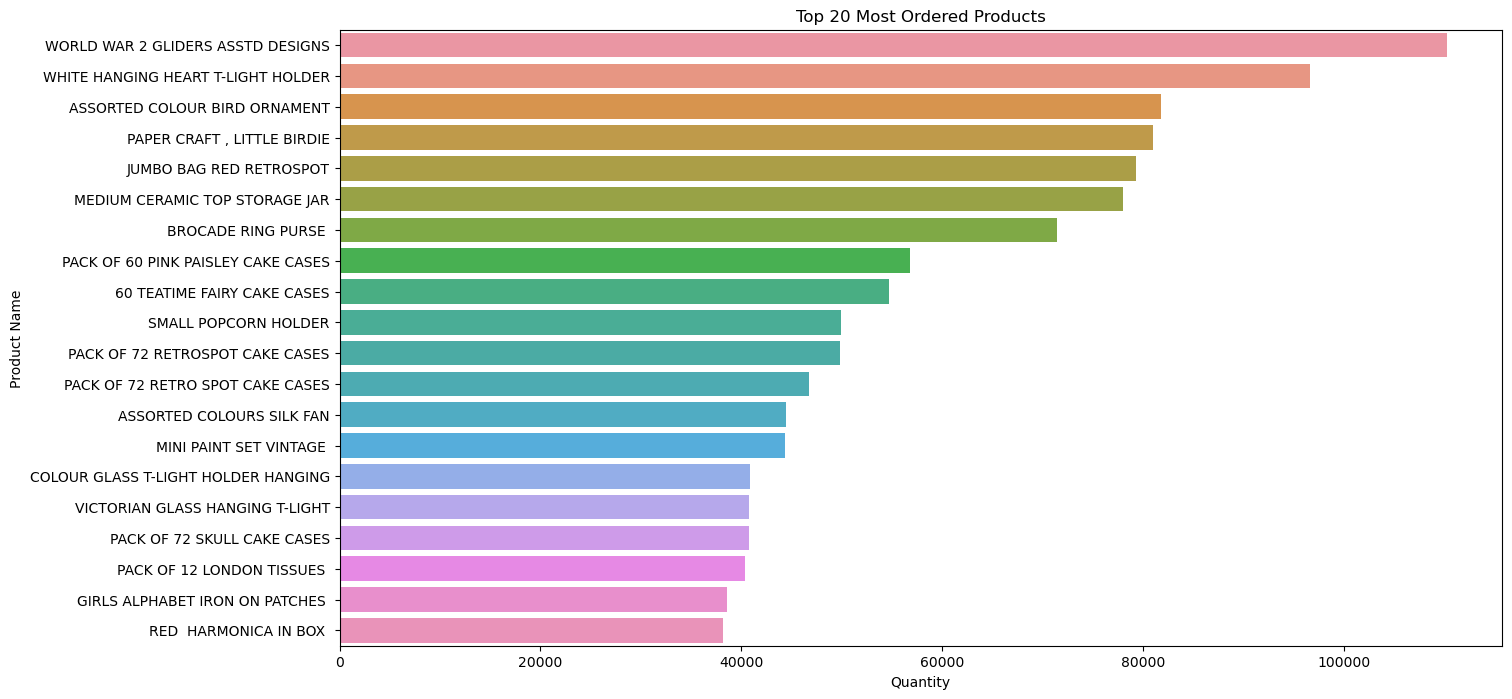

In [15]:
# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create the bar plot
sns.barplot(x='Quantity', y='Description', data=Most_Ordered_sorted.head(20))

# Set the title and labels
plt.title('Top 20 Most Ordered Products')
plt.xlabel('Quantity')
plt.ylabel('Product Name')

# Show the plot
plt.show()


### Insight 1.
1. Top Selling Products: The chart provides a clear view of the top-selling products based on the quantity sold. These products are likely to be popular among customers or may have been heavily promoted.

2. Sales Performance: By comparing the quantities sold for different products, you can assess the relative sales performance of each item. Products with higher quantities sold indicate stronger demand or more effective marketing strategies.

3. Inventory Management: Identifying the most sold products can help in inventory management. It allows businesses to prioritize restocking and allocate resources efficiently to meet demand.

4. Customer Preferences: Analyzing the top-selling products can also reveal insights into customer preferences and buying behavior. Understanding which products are most popular can guide product development and marketing strategies.

5. Opportunities for Growth: Products that are consistently among the top sellers represent opportunities for growth. Businesses can focus on expanding their offerings or investing more resources in promoting these products to further capitalize on their popularity.

#### Grouping and sorting most cancelled orders so we can have a insight, that which products are getting cancelled mostly

In [16]:
Most_Cancelled = Cancelled.groupby('Description')['Quantity'].sum().reset_index()
Most_Cancelled_sorted = Most_Cancelled.sort_values(by='Quantity', ascending=False).tail(20)
Most_Cancelled_sorted.tail(20)

,Description,Quantity
254,BLACK BIRD GARDEN DESIGN MUG,-2981
837,Discount,-3068
2486,SET/20 FRUIT SALAD PAPER NAPKINS,-3074
927,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3159
2955,WHITE HANGING HEART T-LIGHT HOLDER,-3638
2101,RED POLKADOT PUDDING BOWL,-3648
2768,THE KING GIFT BAG,-3744
1895,PINK BLUE FELT CRAFT TRINKET BOX,-3867
2310,S/4 BLUE ROUND DECOUPAGE BOXES,-3940
2941,WHITE BIRD GARDEN DESIGN MUG,-4320


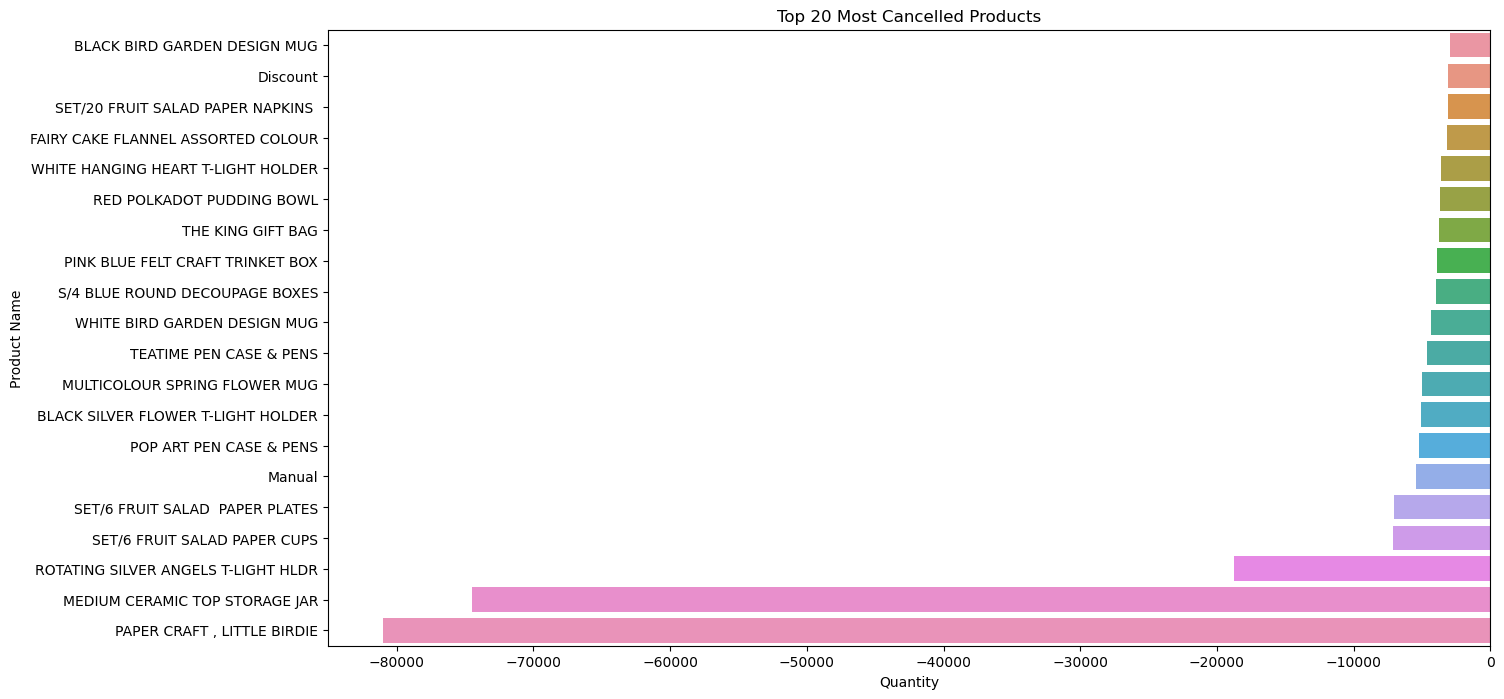

In [17]:
# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create the bar plot
sns.barplot(x='Quantity', y='Description', data=Most_Cancelled_sorted.tail(20))

# Set the title and labels
plt.title('Top 20 Most Cancelled Products')
plt.xlabel('Quantity')
plt.ylabel('Product Name')

# Show the plot
plt.show()


### Insight 2
1. Identify the Root Causes: We Can Investigate why these specific items are being returned in such large quantities. Common reasons for returns include product defects, shipping damage, incorrect orders, poor product descriptions, or customer dissatisfaction with the product.

2. Quality Control: Implement rigorous quality control measures to ensure that products meet quality standards before they are shipped to customers. This can help reduce returns due to product defects or damage.

3. Improve Product Descriptions: Ensure that product descriptions are accurate and detailed to set clear expectations for customers. Include information about product features, dimensions, materials, and usage to help customers make informed purchasing decisions.

4. Enhance Packaging: Improve packaging to protect products during transit and minimize the risk of damage. Consider using protective materials, secure packaging methods, and appropriate box sizes to prevent items from being damaged in transit.

5. Streamline Order Fulfillment: Optimize order fulfillment processes to reduce errors and minimize the likelihood of shipping incorrect items to customers. Implement barcode scanning, order verification checks, and staff training to improve accuracy.

6. Customer Feedback Analysis: Analyze customer feedback and return reasons to identify common issues and areas for improvement. Use customer feedback to address recurring issues and prioritize product or service improvements.

7. Product Testing and Sampling: Conduct product testing and sampling to ensure that products meet quality standards and customer expectations before they are mass-produced and shipped to customers.

8. Monitor Return Rates: Continuously monitor return rates and track the effectiveness of implemented solutions. Adjust strategies as needed based on changing customer preferences, market trends, and feedback from customers and stakeholders.

#### Extracting Month and Year from Date so we can visualise the Time wise data

In [18]:
# Assuming df is your DataFrame and 'date_column' is the column containing dates
Delivered['InvoiceDate'] = pd.to_datetime(Delivered['InvoiceDate'])  # Convert the column to datetime if it's not already in datetime format

# Extract the month from the date column
Delivered['Month'] = Delivered['InvoiceDate'].dt.month
Delivered['Year'] = Delivered['InvoiceDate'].dt.year

Delivered['Month'] = Delivered['Month'].astype(str)
Delivered['Year'] = Delivered['Year'].astype(str)

Delivered['Month_of_Sales']= Delivered['Month']+Delivered['Year']

# Display the DataFrame with the extracted month
Delivered

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year_of_Trade,Cancelled,Month,Year,Month_of_Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,122009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010,No,12,2009,122009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009-2010,No,12,2009,122009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009-2010,No,12,2009,122009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009-2010,No,12,2009,122009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2010-2011,No,12,2011,122011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2010-2011,No,12,2011,122011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2010-2011,No,12,2011,122011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2010-2011,No,12,2011,122011


#### Time Series Analysis for Finding Months when sales is low

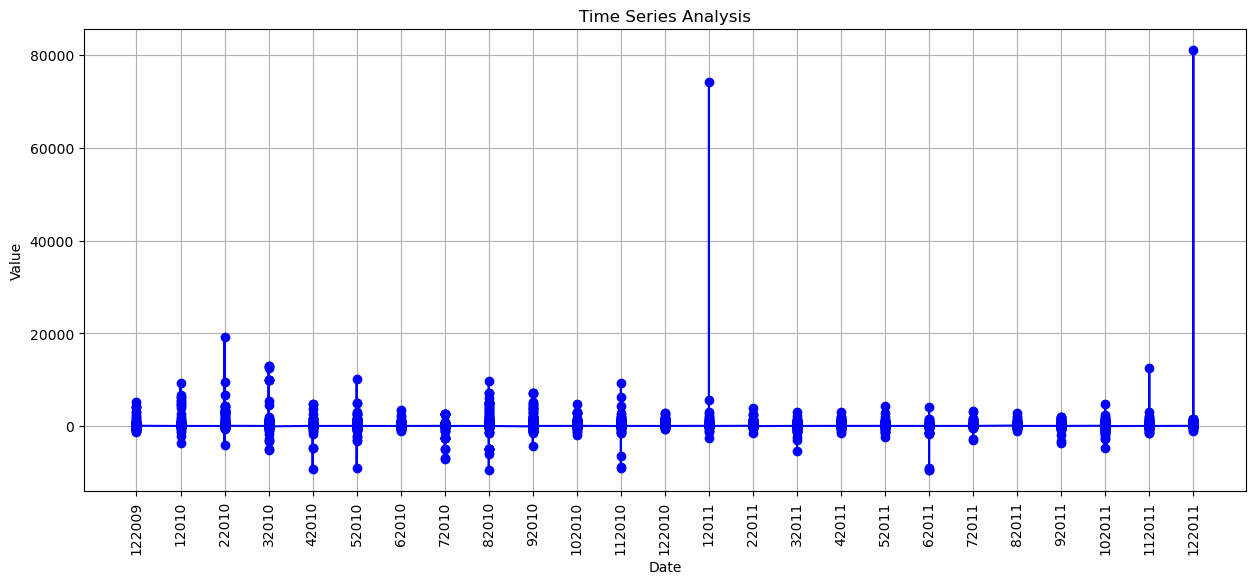

In [19]:
# Set the 'date' column as the index of the DataFrame
Delivered.set_index('Month_of_Sales', inplace=True)

# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(Delivered.index, Delivered['Quantity'], color='blue', marker='o', linestyle='-')
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.xticks(rotation=90)

plt.show()


### Insight 3

1. Analyze Sales Data: Review sales data to identify trends, patterns, and areas of weakness. Can see that we have low sales in June 2010, Dec 2010, Apr 2011, Aug 2011.

2. Understand Customer Needs: Gain insights into your target audience's preferences, needs, and pain points. Conduct customer surveys, interviews, or focus groups to gather feedback and understand what motivates customers to make purchases.

3. Review Marketing Strategies: Evaluate your marketing efforts to determine their effectiveness in reaching and engaging your target audience. Identify which marketing channels are performing well and which ones may need adjustment or reallocation of resources.

4. Improve Product or Service Offering: Assess your product or service offering to ensure it meets the needs and expectations of your target market. Consider introducing new products or services, updating existing ones, or offering promotions or discounts to incentivize purchases.

5. Enhance Customer Experience: Focus on delivering exceptional customer service and creating positive experiences for your customers. Train your staff to provide knowledgeable and attentive service, streamline the purchasing process, and address customer concerns promptly and effectively.

6. Invest in Sales and Marketing: Allocate resources to sales and marketing initiatives that have the greatest potential to drive sales growth. Invest in targeted advertising campaigns, social media marketing, content marketing, and other promotional activities to increase brand visibility and attract customers.

#### Grouping and sorting Country wise data, So we can check where we can expand and Revise our Strategies for Expansion

In [20]:
Countrywise = Delivered.groupby('Country')['Quantity'].sum().reset_index()

In [21]:
Countrywise_sorted = Countrywise.sort_values(by='Quantity', ascending=False)

In [22]:
Countrywise_sorted

,Country,Quantity
40,United Kingdom,9061154
26,Netherlands,384617
11,EIRE,340564
14,France,275288
10,Denmark,237925
15,Germany,228003
0,Australia,104398
35,Sweden,88650
36,Switzerland,52885
34,Spain,50807


#### Visualising Country wise Sales on basis of Quantity Ordered

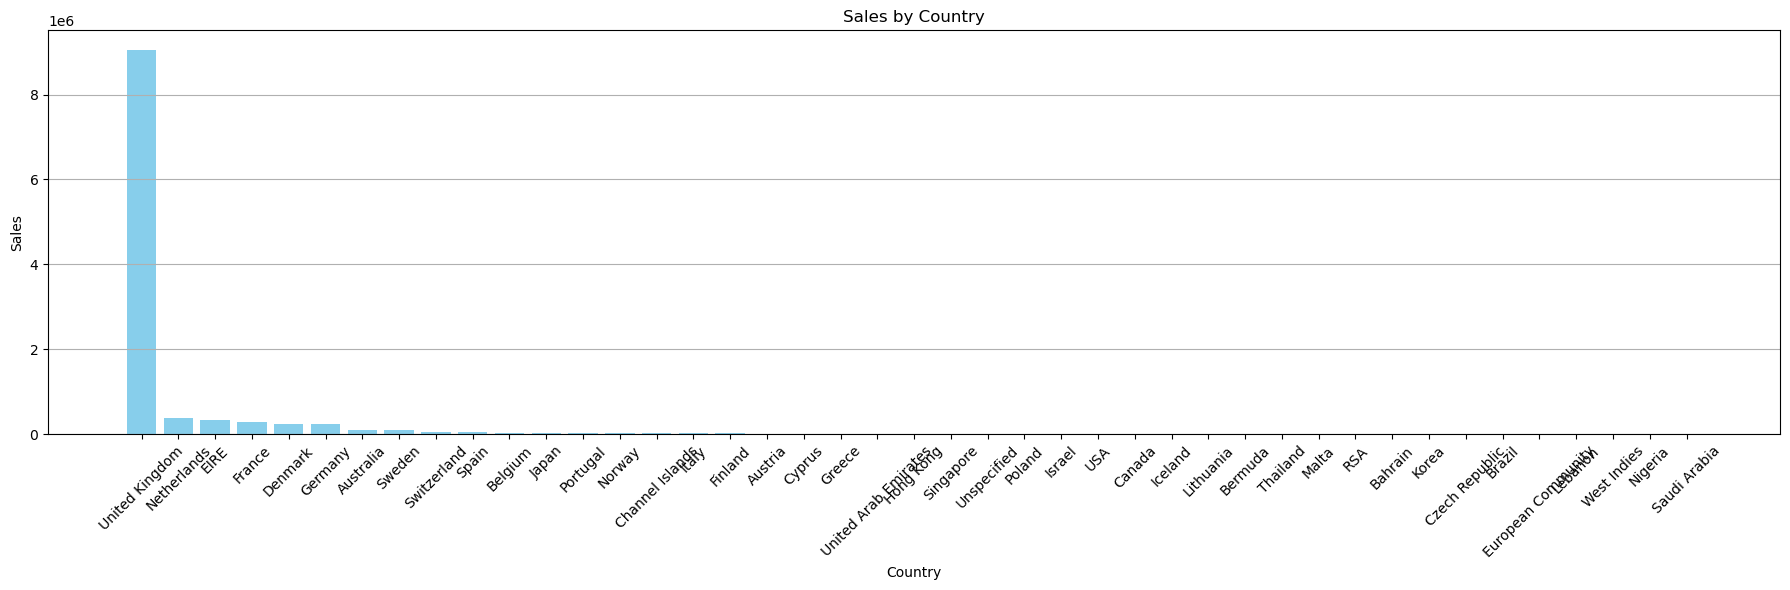

In [23]:
plt.figure(figsize=(18, 6))
plt.bar(Countrywise_sorted['Country'], Countrywise_sorted['Quantity'], color='skyblue')
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Show gridlines on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Insight 4
As we can see sales is very good and high in United kingdom but low in other countries
When sales are very good in one country but low in others, it's important to take a strategic approach to address the disparities and maximize overall sales performance. Here are some steps we can consider:

1. Identify High-Performing Country: Analyze sales data to identify the country where sales are performing exceptionally well. Understand the factors contributing to the success in that country, such as market demand, customer preferences, competitive landscape, and local economic conditions.

2. Market Segmentation: Segment the target market based on geographical, demographic, psychographic, or behavioral factors. Tailor your marketing strategies, product offerings, and pricing to meet the unique needs and preferences of customers in each country or market segment.

3. Market Expansion: Explore opportunities to expand your presence in high-performing markets while also identifying strategies to increase sales in low-performing countries. Consider entering new geographic markets, forming strategic partnerships, or investing in targeted marketing campaigns to reach new customers.

4. Localization: Customize your products, services, and marketing efforts to resonate with local customers in each country. Adapt your messaging, branding, and promotional materials to reflect cultural nuances, language preferences, and market trends.

5. Strategic Partnerships: Explore partnerships with local businesses, distributors, or retailers to enhance distribution channels and reach customers more effectively in low-performing markets. Collaborate with industry stakeholders to leverage their expertise, networks, and resources.

#### Finding Missing Customer ID's with help of Customer ID which are available in other invoices

In [24]:
# For_Missing Customer ID
New_df= df[['Invoice','Customer ID']]
New_df= New_df.rename(columns={'Customer ID':'Customer ID1'})

Delivered = pd.merge(Delivered, New_df, left_on='Invoice', right_on='Invoice', how='left')

In [25]:
Delivered

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year_of_Trade,Cancelled,Month,Year,Customer ID1
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,13085.0
1,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,13085.0
2,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,13085.0
3,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,13085.0
4,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009-2010,No,12,2009,13085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112358578,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2010-2011,No,12,2011,12680.0
112358579,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2010-2011,No,12,2011,12680.0
112358580,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2010-2011,No,12,2011,12680.0
112358581,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France,2010-2011,No,12,2011,12680.0


#### Creating New Column with Help of Numpy Library where we can impute Customre ID which are missing

In [26]:
Delivered['Customer_ID_Final'] = np.where(Delivered['Customer ID'].isna(), Delivered['Customer ID1'], Delivered['Customer ID'])

#### Droping Extra Columns which are not Required

In [27]:
Delivered.drop(['Customer ID', 'Customer ID1'], axis=1, inplace=True)

#### Renaming the New Column to Our Previous Column

In [28]:
Delivered= Delivered.rename(columns={'Customer_ID_Final':'Customer ID'})

#### Grouping the Data on Customer wise so we can have a insight which customers are our Best Buyers so we can make a strategy for Busienss expansion

In [29]:
Customerwise = Delivered.groupby('Customer ID')['Quantity'].sum().reset_index()
Customerwise_sorted = Customerwise.sort_values(by='Quantity', ascending=False)
Customerwise_sorted['Customer ID'] = Customerwise_sorted['Customer ID'].astype(str)


In [30]:
Customerwise_sorted= Customerwise_sorted.head(20)
Customerwise_sorted

,Customer ID,Quantity
2279,14646.0,21554698
1933,14298.0,8500817
1791,14156.0,7687925
68,12415.0,7597253
1732,14096.0,7161696
2541,14911.0,6727681
731,13081.0,5674948
1332,13694.0,5453821
5112,17511.0,5116502
1912,14277.0,4115166


#### Visual on Customer wise Orders

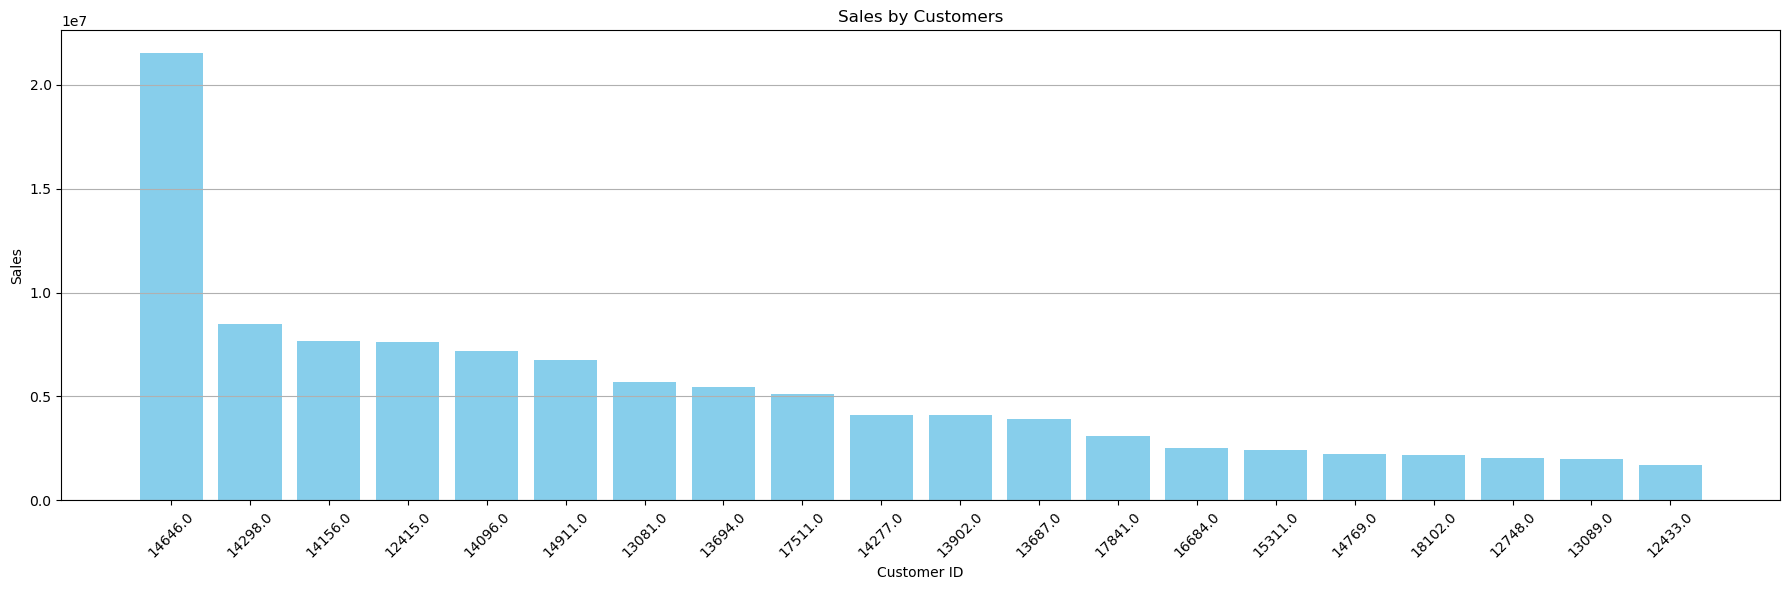

In [31]:
plt.figure(figsize=(18, 6))
plt.bar(Customerwise_sorted['Customer ID'], Customerwise_sorted['Quantity'], color='skyblue')
plt.title('Sales by Customers')
plt.xlabel('Customer ID')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(axis='y')  # Show gridlines on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Insight 5
1. Repeat Business: Good customers are more likely to make repeat purchases over time, providing a steady stream of revenue for your business. By fostering strong relationships with these customers, you can encourage loyalty and increase their lifetime value.
2. Word-of-Mouth Marketing: Satisfied customers are more likely to recommend your products or services to others, leading to positive word-of-mouth marketing. Leveraging testimonials, reviews, and referrals from satisfied customers can help attract new customers and expand your customer base.
3. Cross-Selling and Upselling Opportunities: Good customers are more receptive to cross-selling and upselling efforts, allowing you to increase sales by recommending complementary products or premium upgrades. By understanding their needs and preferences, you can offer personalized recommendations that add value and enhance their overall experience.
4. Competitive Advantage: Building strong relationships with good customers can provide a competitive advantage by differentiating your business from competitors. By delivering exceptional customer service, personalized experiences, and added value, you can create a positive reputation and stand out in the market.
5. Reduced Marketing Costs: Acquiring new customers can be expensive, so retaining and cultivating relationships with existing good customers can help reduce overall marketing costs. By focusing on customer retention and loyalty initiatives, you can maximize the return on your marketing investments and improve profitability.

#### Methodology
To analyze this dataset effectively, i followed a systematic methodology that involves several steps:

1. Data Cleaning:
Check for missing values in the data.
Handle missing values by imputing or removing them based on the context of the dataset.

2. Exploratory Data Analysis (EDA):
Understand the distribution of each variable in the dataset using summary plots.
Explore the relationships between variables through visualizations such as bar plots.
Identify patterns, trends in the data.

3. Feature Engineering:
Create new features like month and year from existing ones that might be useful for analysis or modeling

4. Customer Segmentation:
Segment customers based on their purchasing behavior, such as frequency, recency, and monetary value (RFM analysis).
 
5. Time Series Analysis:
Analyze sales trends over time using time series techniques 

6. Geospatial Analysis:
Explore geographical patterns in customer distribution and sales.
Identify regions with high sales potential or areas where marketing efforts should be focused.

### Recommendations 
1. We Should Focus Which Products are most ordered, We can Ask Discount from where we are buying these sa we are best seller. It will Increase our Profit and we can provide more discounts to our Cusotmers

2. We Should Focus on Most Cancelled Items and Should give a feedback to their Manufacturers(sellers) which can help in improving these products. It can affect the faith of customer in us if they are not satisfied.

3. We Can Start a Incentive Programme for Our Outlet Managers So they can Cross Sale other products to our Best Customers.

4. We Can Analyse the United Kingdom Order Data, on Basis of this we can Sale the Same Products in Other Countries with New Strategies.

###     <---------------------------------------------------------------Thank-You--------------------------------------------------------------->